In [1]:
#Ref : https://musicinformationretrieval.com/novelty_functions.html

import os
import sys
from os import listdir
from os.path import isfile, join
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
import librosa
import librosa.display
import IPython.display as ipd

%matplotlib inline

print(sys.version)
print('librosa : ', librosa.__version__)
print('numpy : ', np.__version__)
print('scipy : ', sp.__version__)
print('matplotlib : ', mpl.__version__)

3.6.1 |Anaconda custom (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]
librosa :  0.5.1
numpy :  1.12.1
scipy :  1.0.1
matplotlib :  2.0.2


In [2]:
files = [os.path.join('./sample_audio', f) for f in os.listdir('./sample_audio') if os.path.isfile(os.path.join('./sample_audio', f))]
print(files)

#files = "./sample_audio/10sec.wav"

['./sample_audio\\10sec.wav', './sample_audio\\5sec.wav', './sample_audio\\kv598-normal.wav', './sample_audio\\kv598-varied.wav']


In [83]:
def zerolistmaker(n):
    listofzeros = [0] * n
    return listofzeros

def kl(p, q):
    """Kullback-Leibler divergence D(P || Q) for discrete distributions
    Parameters
    ----------
    p, q : array-like, dtype=float, shape=n
    Discrete probability distributions.
    """
    p = np.asarray(p, dtype=np.float)
    q = np.asarray(q, dtype=np.float)

    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

print(kl([0,1,0],[0,1,0]))
print(kl([0,1,0],[0,0.5,0.5]))
print(kl([0,1,0],[0.3,0.3,0.3]))



'''Chord

A : A C# E 
Bm : B D F# 
C#m : C# E G#
D : B F# A
E : E G# B
F#m : F# A C#
G# : G# B F#
A : A C# E

'''

c_ = 1
d_ = 2
e_ = 4
f_ = 6
g_ = 8
a_ = 9
b_ = 11

a__=[a_,c_,e_]
b__=[b_,d_,f_]
c__=[c_,e_,g_]
d__=[b_,f_,a_]
e__=[e_,g_,b_]
f__=[f_,a_,c_]
g__=[g_,b_,f_]

chords__ = [a__,b__,c__,d__,e__,f__,g__]

chords = []
for chord in chords__:
    temp = zerolistmaker(12)
    for note in chord:
        temp[note] = 1
        
    #A = [0,1,0,0,1,0,0,0,0,1,0,0]
    print(temp)

    #normalize
    temp /= np.sum(temp)
    chords.append(temp)


0.0
0.69314718056
1.20397280433
[0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1]
[0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1]
[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]
[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1]


C:\Users\Chang Minwook\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
C:\Users\Chang Minwook\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
C:\Users\Chang Minwook\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


tempo :  151.999080882
How many Madi?:  4.222972972972973
(12, 216)
[  4.04707221  29.63652839   1.0712775    2.06802765  26.96251723
   3.42692553   0.5          4.21436451  12.36599358  13.13942716   0.5
   4.40263264]
[ 0.03954738  0.28960371  0.01046836  0.02020846  0.26347368  0.0334874
  0.00488593  0.04118214  0.12083864  0.12839651  0.00488593  0.04302187]
A :  0.443279595493
Bm :  3.24366805101
C#m :  0.463501983827
D :  2.40807953226
E :  1.09910364351
F#m :  1.77247787258
G#o :  2.42830192059
*** Final: A  -  0.443279595493
[  4.67081087   9.57859116  27.24254329  18.89361754  24.08237073
   1.02223849   9.16942932   2.86564867  24.70882647  23.38570374
   3.09190967  33.89946412]
[ 0.02557791  0.05245348  0.14918335  0.10346366  0.13187787  0.0055979
  0.05021287  0.01569263  0.13530842  0.12806284  0.01693166  0.18563742]
A :  1.24436827143
Bm :  1.09406206232
C#m :  1.22602305728
D :  1.14494704844
E :  0.804733495211
F#m :  1.56623661052
G#o :  1.1266018343
*** Final: E 

C:\Users\Chang Minwook\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
C:\Users\Chang Minwook\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


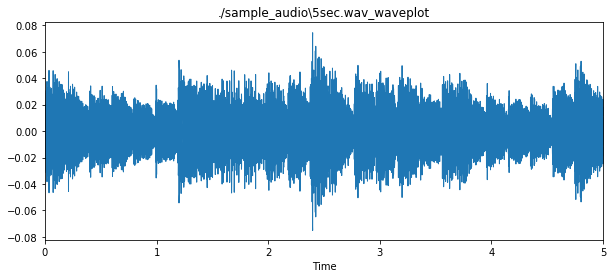

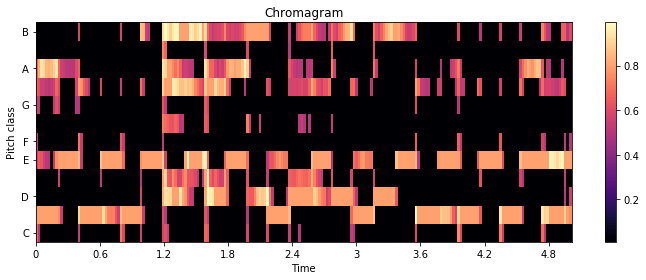

In [134]:
duration = 5


madi_time = 1.184
#1마디 : 1.184
#못갖춘마디
y, sr = librosa.load(files[2],offset = 1.184/6, duration = duration)

onset_env = librosa.onset.onset_strength(y, sr=sr)
tempo = librosa.beat.estimate_tempo(onset_env, sr=sr)

print( "tempo : ", tempo) #(beats per minute)
print("How many Madi?: ",duration/madi_time) 

half_measure = 60 / tempo
duration = len(y)/sr

'''
About STFT function
(y, n_fft=2048, hop_length=512, win_length=2048, window='hann', center=True, dtype=<class 'numpy.complex64'>, pad_mode='reflect
[shape=(1 + n_fft/2, t = 1 + sr*time/hop_length), dtype=dtype]
'''

plt.figure(figsize=(10,4))
librosa.display.waveplot(y,sr)
plt.title(files[1] + "_waveplot")

S = np.abs(librosa.stft(y))
chroma = librosa.feature.chroma_stft(S=S, sr=sr)

print(chroma.shape)

pointer = 0



def chordname(idx):
    
    if idx == 0:
        return "A"
    elif idx == 1:
        return "Bm"
    elif idx == 2:
        return "C#m"
    elif idx == 3:
        return "D"
    elif idx == 4:
        return "E"
    elif idx == 5:
        return "F#m"
    elif idx ==6 :
        return "G#o"
    else:
        return "?"
'''
#Print
print(chroma.shape)
print(chroma)
print(chroma[0].shape)
print(chroma.T.shape)
print(chroma.T[0:50])
''' 
result = []    
for i in range(int(duration/madi_time)):

    temp = pointer
    pointer += sr*madi_time/512#hop_length
    #print(pointer)
    #MW : 제곱
    chroma.T[chroma.T<0.5] = 0.01
    chroma.T[chroma.T==1] = 0.8
    
    sum_ = np.sum(chroma.T[:][int(temp):int(pointer)], axis = 0)
    print(sum_)
    #sum_[sum_<np.max(sum_)/4] = 0.001
    sum_ /= np.sum(sum_)
    print(sum_)
    
    score = 100
    score_idx = 0
    for i in range(len(chords)):

        new_score = kl(chords[i], sum_)
        print(chordname(i),": ", new_score)
        if score >new_score:
            score = new_score
            score_idx = i
    #print score
    
    print("*** Final:",chordname(score_idx)," - ", score)
    result.append(chordname(score_idx))

print(result)
    #print(chordname(score_idx))
    
#Plotting
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()




In [135]:

y, sr = librosa.load(files[2])

onset_env = librosa.onset.onset_strength(y, sr=sr)

tempo = librosa.beat.estimate_tempo(onset_env, sr=sr)

print( "tempo : ", tempo) #(beats per minute)

half_measure = 60 / tempo

print(half_measure)


tempo :  151.999080882
0.394739229025


In [9]:
#0.394